# NAME :- NITIN SAHU (INTERN AT THE SPARKS FOUNDATION)
### THE SPARKS FOUNDATION GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP) JUNE-21 BATCH
### DATA SCIENCE AND BUSINESS ANALYTICS
#### TASK-1 :- PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS, USING SUPERVISED ML.

### Import Libraries

In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Load The Data

In [3]:
s_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully.")
s_data.head(10)

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploratory Data Analysis 

In [4]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#Information of the Dataset
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#Shape of the Dataset
s_data.shape

(25, 2)

In [7]:
#Datatype of the Dataset
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
#Checking the Missing values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
#Checking Statistical Details Of Dataset
s_data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Data Visualization 

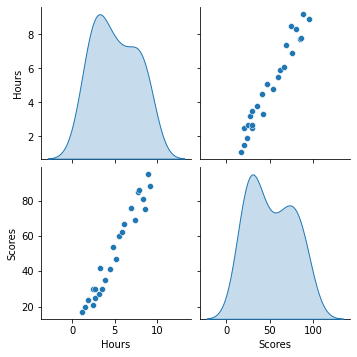

In [10]:
sb.pairplot(s_data,diag_kind='kde')

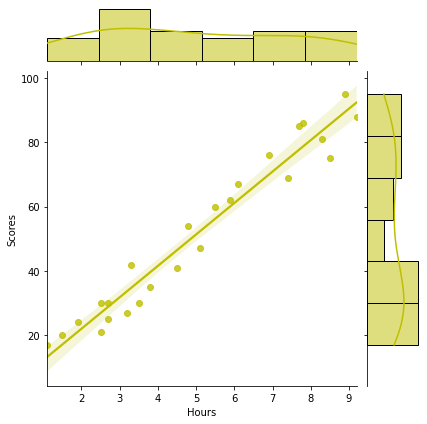

In [15]:
sb.jointplot(x="Hours", y="Scores", data=s_data, kind="reg" , color='y')

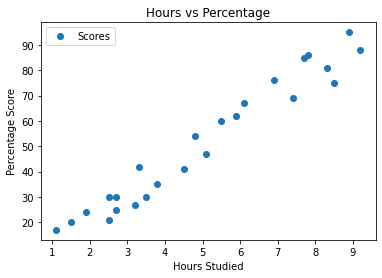

In [11]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Preparing the data
###  (divide the data into 'attributes' and 'labels')

In [12]:
X = s_data.iloc[:, :-1].values 
y = s_data.iloc[:, 1].values

## Train-Test-Split 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Taining the Simple Linear Regression Algorithm on the Training Set 

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [17]:
regressor.fit(X,y)
print("Training Complete.")

Training Complete.


## Plotting the Regression line 

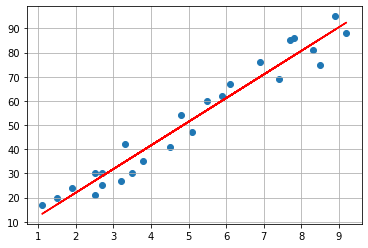

In [21]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line,'r')
plt.grid()
plt.show()

## Making Prediction 

In [22]:
#predicting the scores
y_pred = regressor.predict(X_test)
print(y_pred)

[17.14737849 33.76624426 74.8246185  26.92318188 60.16091341]


In [23]:
print(y_test)

[20 27 69 30 62]


In [29]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


## Predicting the Score if the student studies for 9.25 hrs/day 

In [35]:
hrs = 9.25
own_pred = regressor.predict([[hrs]])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.9098547701573


## Model Evaluation 

In [38]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Mean Root Square Error:", nm.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.071877793635603
Mean Squared Error: 20.13894812994016
Mean Root Square Error: 4.487643939746129


## Result : If a student studies 9.25 hrs/day then the predicted score will be 92.90. 